In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt



In [2]:
import seaborn as sns

In [3]:
df_raw = pd.read_csv('/Users/donnelly/school/psych755/Assignments/755final/data/product_positioning_raw.csv')

In [4]:
df_raw.shape

(1000, 10)

In [5]:
df_raw.select_dtypes('object').describe()

,Product Position,Promotion,Foot Traffic,Consumer Demographics,Product Category,Seasonal
count,1000,1000,1000,1000,1000,1000
unique,3,2,3,4,3,2
top,End-cap,No,High,Families,Clothing,Yes
freq,342,528,340,263,338,505


In [6]:
print(df_raw.head())

   Product ID Product Position  Price  Competitor's Price Promotion  \
0      185102            Aisle  17.07               16.16        No   
1      188771            Aisle  17.41               13.13        No   
2      180176          End-cap  43.16               38.37       Yes   
3      112917            Aisle  42.26               38.98       Yes   
4      192936          End-cap  47.94               45.59        No   

  Foot Traffic Consumer Demographics Product Category Seasonal  Sales Volume  
0       Medium              Families         Clothing       No          2823  
1          Low               Seniors         Clothing       No           654  
2       Medium          Young adults      Electronics      Yes          2220  
3          Low              Families         Clothing      Yes          1568  
4       Medium      College students         Clothing      Yes          2942  


In [7]:
missing_rows = df_raw[df_raw.isnull().any(axis=1)]
missing_rows

,Product ID,Product Position,Price,Competitor's Price,Promotion,Foot Traffic,Consumer Demographics,Product Category,Seasonal,Sales Volume


In [8]:
df_raw.isnull().sum()

Product ID               0
Product Position         0
Price                    0
Competitor's Price       0
Promotion                0
Foot Traffic             0
Consumer Demographics    0
Product Category         0
Seasonal                 0
Sales Volume             0
dtype: int64

In [9]:
print(df_raw.dtypes)

Product ID                 int64
Product Position          object
Price                    float64
Competitor's Price       float64
Promotion                 object
Foot Traffic              object
Consumer Demographics     object
Product Category          object
Seasonal                  object
Sales Volume               int64
dtype: object


In [10]:
df_raw['Product Position'] = df_raw['Product Position'].astype('category')
df_raw['Promotion'] = df_raw['Promotion'].astype('category')
df_raw['Foot Traffic'] = pd.Categorical(df_raw['Foot Traffic'], 
                                        categories=['Low', 'Medium', 'High'], 
                                        ordered=True)
df_raw['Consumer Demographics'] = df_raw['Consumer Demographics'].astype('category')
df_raw['Product Category'] = df_raw['Product Category'].astype('category')
df_raw['Seasonal'] = df_raw['Seasonal'].astype('category')

print(df_raw.dtypes)


Product ID                  int64
Product Position         category
Price                     float64
Competitor's Price        float64
Promotion                category
Foot Traffic             category
Consumer Demographics    category
Product Category         category
Seasonal                 category
Sales Volume                int64
dtype: object


In [11]:
print(df_raw['Foot Traffic'].value_counts())

Foot Traffic
High      340
Medium    338
Low       322
Name: count, dtype: int64


In [12]:
print(df_raw['Sales Volume'].dtype)


int64


In [13]:
#df_test = df_raw[['Price', "Competitor's Price", 'Product Position', 'Sales Volume']]
df_test = df_raw[['Price', "Competitor's Price"]]
print(df_raw['Price'].value_counts())

Price
37.72    4
19.87    3
49.98    3
13.33    3
17.05    3
        ..
29.60    1
40.96    1
41.34    1
20.15    1
22.82    1
Name: count, Length: 897, dtype: int64


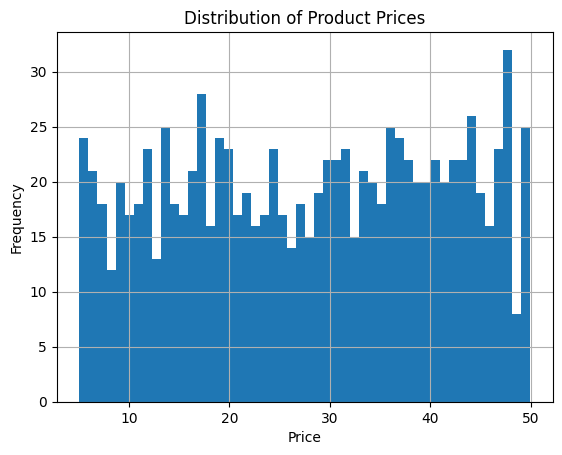

In [29]:
df_raw['Price'].hist(bins=50)
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Distribution of Product Prices')
plt.show()

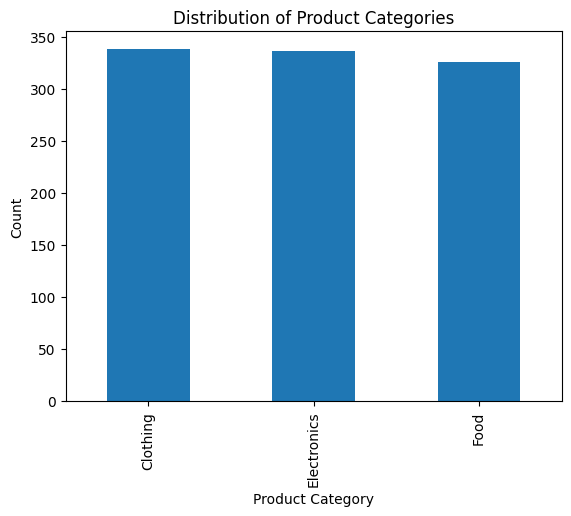

In [30]:
df_raw['Product Category'].value_counts().plot(kind='bar')
plt.xlabel('Product Category')
plt.ylabel('Count')
plt.title('Distribution of Product Categories')
plt.show()

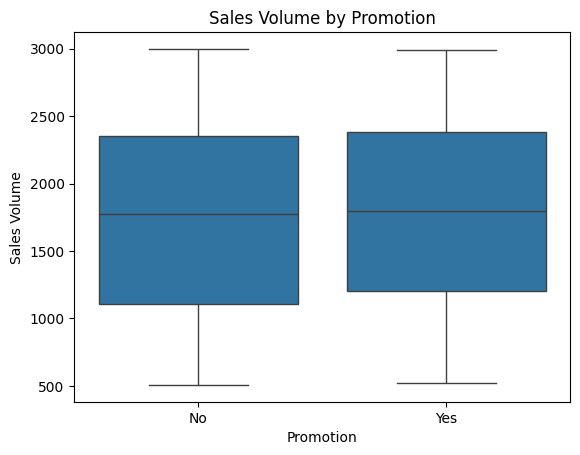

In [34]:

sns.boxplot(x='Promotion', y='Sales Volume', data=df_raw)
plt.title('Sales Volume by Promotion')
plt.show()

/var/folders/yj/y007xzpn71b3cmx87nr5lc340000gn/T/ipykernel_67700/1099625318.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_raw.groupby('Seasonal')['Sales Volume'].mean().plot(kind='bar')


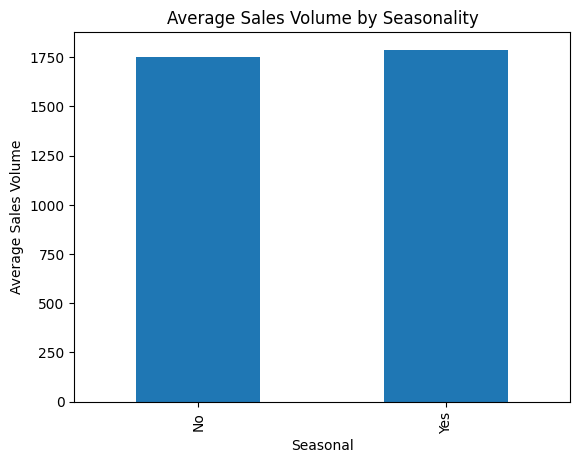

In [35]:
df_raw.groupby('Seasonal')['Sales Volume'].mean().plot(kind='bar')
plt.xlabel('Seasonal')
plt.ylabel('Average Sales Volume')
plt.title('Average Sales Volume by Seasonality')
plt.show()

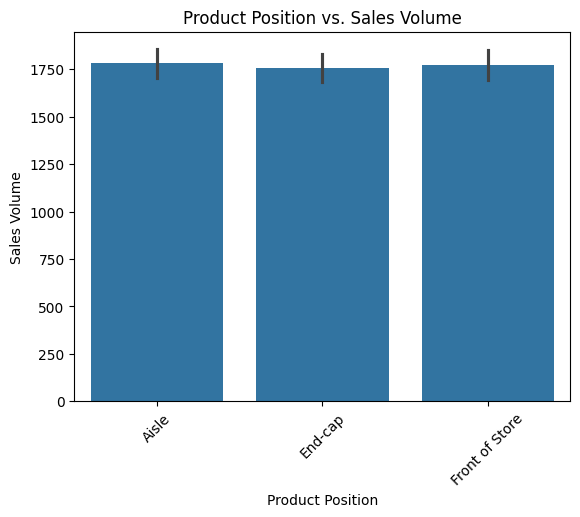

In [21]:
sns.barplot(x='Product Position', y='Sales Volume', data=df_raw)
plt.xticks(rotation=45)
plt.title('Product Position vs. Sales Volume')
plt.show()

In [23]:
avg_sales_by_position = df_raw.groupby('Product Position')['Sales Volume'].mean().reset_index()
print(avg_sales_by_position)

  Product Position  Sales Volume
0            Aisle   1780.794118
1          End-cap   1754.143275
2   Front of Store   1773.345912


/var/folders/yj/y007xzpn71b3cmx87nr5lc340000gn/T/ipykernel_67700/4048344450.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_sales_by_position = df_raw.groupby('Product Position')['Sales Volume'].mean().reset_index()


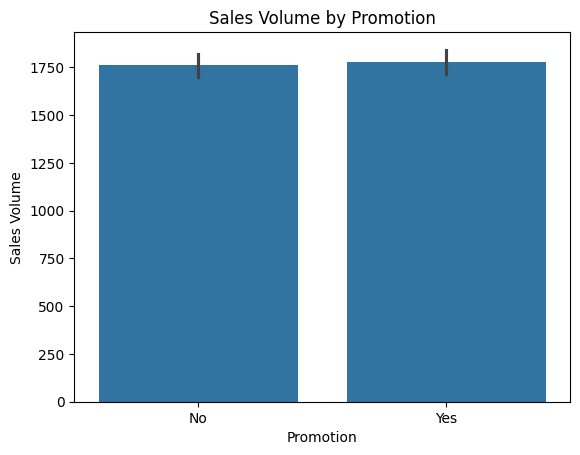

In [25]:
sns.barplot(x='Promotion', y='Sales Volume', data=df_raw)
plt.title('Sales Volume by Promotion')
plt.show()

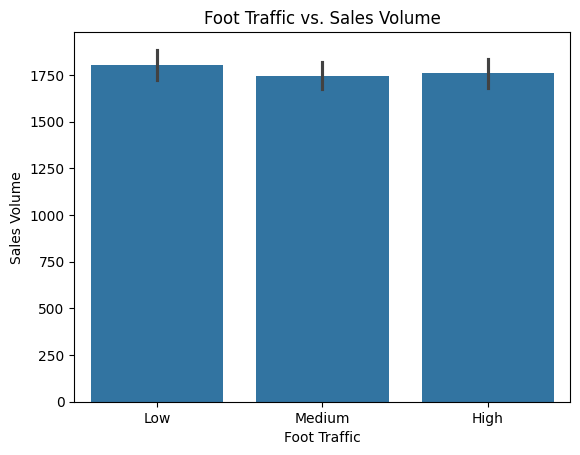

In [27]:
sns.barplot(x='Foot Traffic', y='Sales Volume', data=df_raw, order=['Low', 'Medium', 'High'])
plt.title('Foot Traffic vs. Sales Volume')
plt.show()

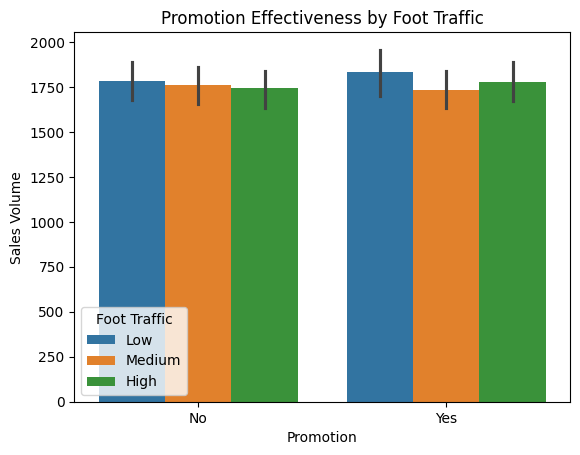

In [28]:
sns.barplot(x='Promotion', y='Sales Volume', hue='Foot Traffic', data=df_raw)
plt.title('Promotion Effectiveness by Foot Traffic')
plt.show()